In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

path = '../../shared_data/round4/'
days = [1, 2, 3]

activity = [pd.read_csv(path + f'prices_round_4_day_{d}.csv', sep=';') for d in days]
activity = pd.concat(activity)
activity.set_index(['product', 'day', 'timestamp'], inplace=True)

trade = pd.concat([pd.read_csv(path + f'trades_round_4_day_{d}_nn.csv', sep=';').assign(day=d) for d in days])
trade.set_index(['symbol', 'day', 'timestamp'], inplace=True)

products = activity.index.get_level_values(0).unique()
products

Index(['COCONUT', 'COCONUT_COUPON'], dtype='object', name='product')

In [197]:
(activity.loc['COCONUT']['ask_price_1'] - activity.loc['COCONUT']['bid_price_1']).describe()

count    30000.000000
mean         1.472633
std          0.499259
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
dtype: float64

In [198]:
(activity.loc['COCONUT_COUPON']['ask_price_1'] - activity.loc['COCONUT_COUPON']['bid_price_1']).describe()

count    29998.000000
mean         1.089006
std          0.284757
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
dtype: float64

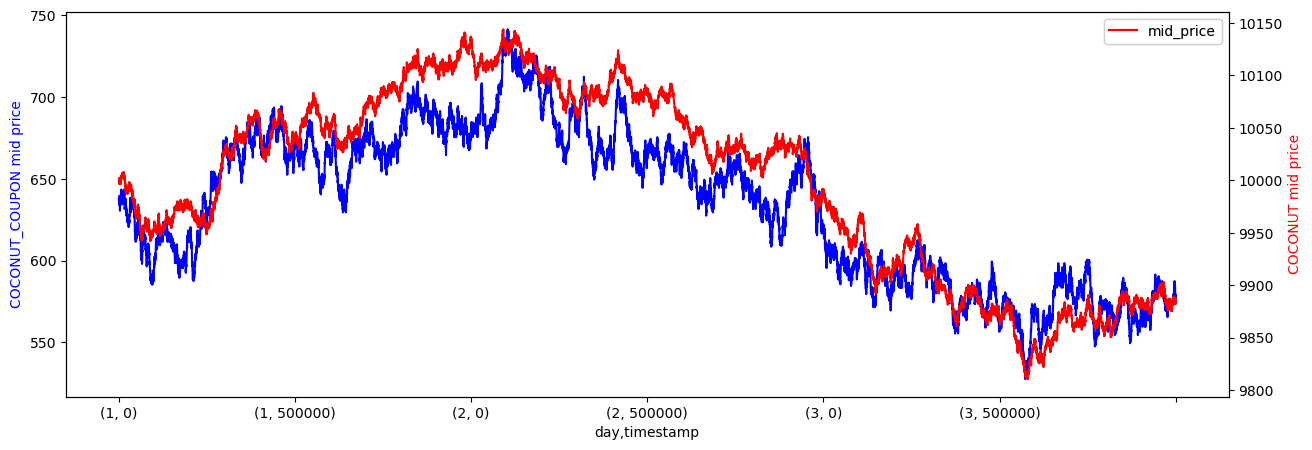

In [199]:
fig, ax = plt.subplots(figsize=(15, 5))
ax2 = ax.twinx()

activity.loc['COCONUT_COUPON'].plot(ax=ax, y=['mid_price'], figsize=(15, 5), color='blue')
ax.set_ylabel('COCONUT_COUPON mid price', color='blue')
activity.loc['COCONUT'].plot(ax=ax2, y=['mid_price'], color='red')
ax2.set_ylabel('COCONUT mid price', color='red')
plt.show()

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


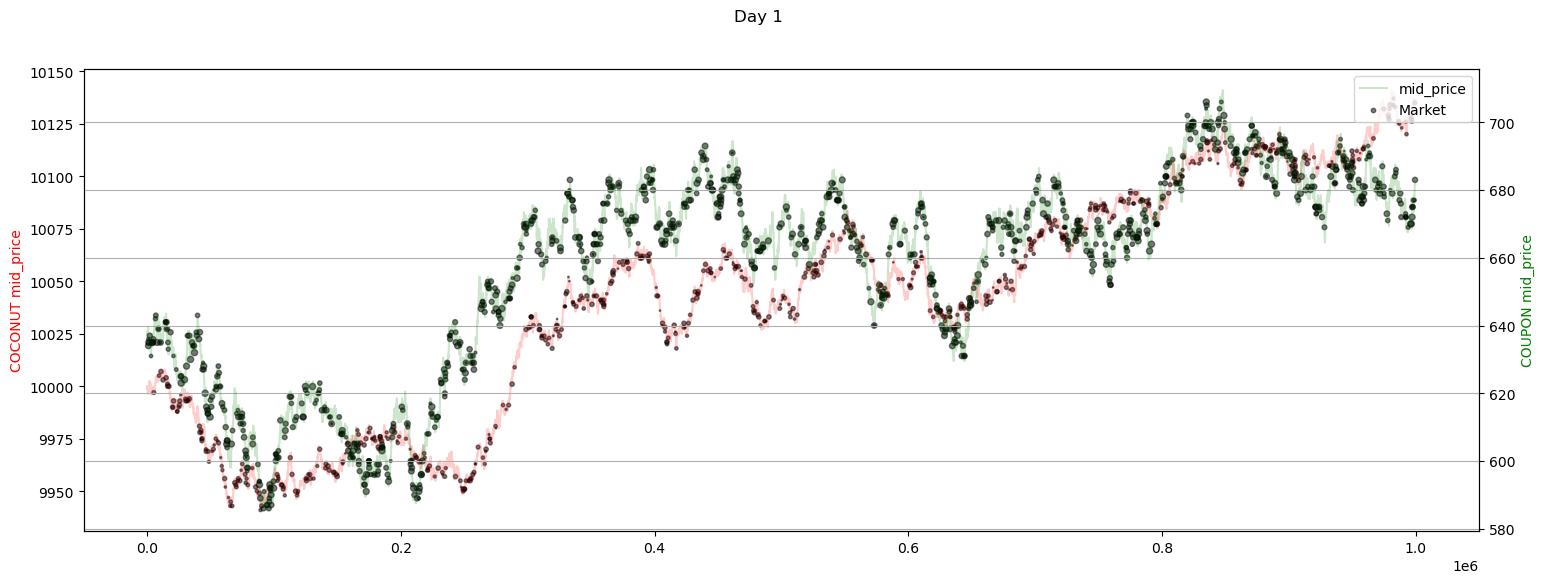

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


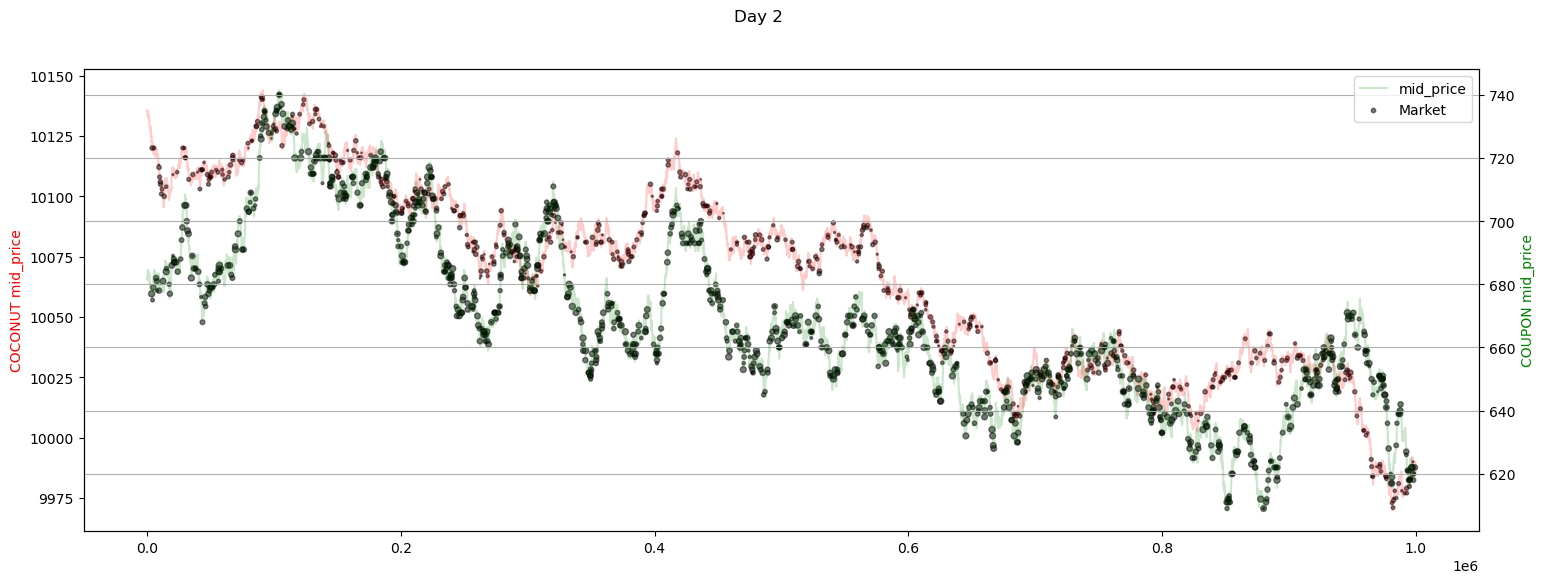

C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coconut = activity.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  activity_coupons = activity.loc['COCONUT_COUPON', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coconut = trade.loc['COCONUT', d]
C:\Users\Meilism\AppData\Local\Temp\ipykernel_33384\2812889719.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  market_coupons = trade.loc['COCONUT_COUPON', d]


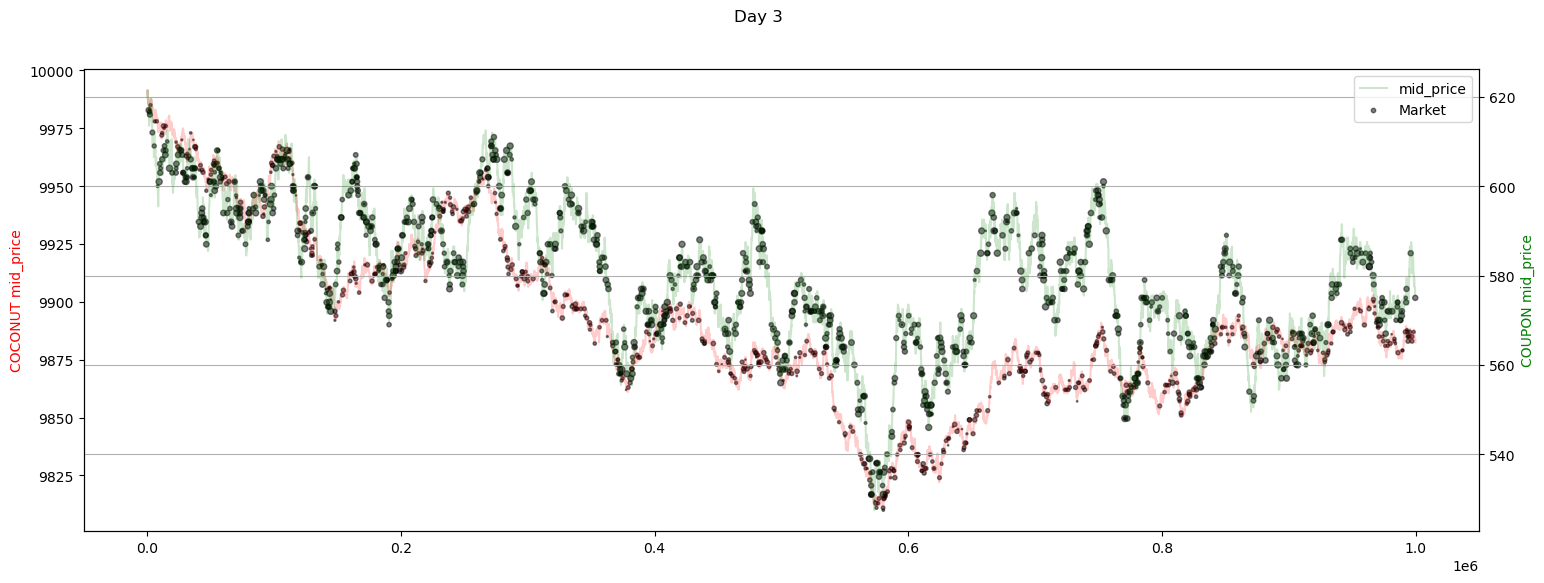

In [202]:
window_size = 20

for d in days:
    activity_coconut = activity.loc['COCONUT', d]
    activity_coupons = activity.loc['COCONUT_COUPON', d]
    market_coconut = trade.loc['COCONUT', d]
    market_coupons = trade.loc['COCONUT_COUPON', d]

    fig, ax1 = plt.subplots(figsize=(18, 6))
    fig.suptitle(f'Day {d}')

    ax2 = ax1.twinx()
    assert isinstance(ax1, plt.Axes)
    assert isinstance(ax2, plt.Axes)
    ax1.plot(activity_coconut['mid_price'], label='mid_price', color='red', alpha=0.2,)
    ax1.scatter(market_coconut.index, market_coconut.price, label='Market', s=1*market_coconut.quantity, color='black', alpha=0.5)
    ax1.set_ylabel('COCONUT mid_price', color='red')
    ax2.plot(activity_coupons['mid_price'], label='mid_price', color='green', alpha=0.2,)
    ax2.scatter(market_coupons.index, market_coupons.price, label='Market', s=1*market_coupons.quantity, color='black', alpha=0.5)
    ax2.set_ylabel('COUPON mid_price', color='green')
    plt.xlabel('Timestamp')
    plt.grid(axis='y')
    plt.legend()    
    plt.show()

In [ ]:
data = pd.DataFrame([activity.loc['COCONUT']['mid_price'], activity.loc['COCONUT_COUPON']['mid_price']]).T
data.columns = ['COCONUT', 'COCONUT_COUPON']
data

In [ ]:
data.corr()

# COCONUT - 2 * COCONUT_COUPON

In [ ]:
# num = data['COCONUT'].sum()/data['COCONUT_COUPON'].sum()
num = 2
diff = data['COCONUT'] - num*data['COCONUT_COUPON']

fig, ax = plt.subplots(figsize=(18, 6))
fig.suptitle(f'COCONUT - {num}*COCONUT_COUPON')
diff.plot(ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('COCONUT - num*COCONUT_COUPON')
plt.grid()
plt.show()

In [ ]:
diff.describe()

In [ ]:
for d in days:
    diff.loc[d].hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT - 2*COCONUT_COUPON')
plt.show()

In [ ]:
diff.groupby(diff.index.get_level_values(0)).describe()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(diff)

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 6))
plot_acf(diff, lags=40, ax=ax[0])
plot_pacf(diff, lags=40, ax=ax[1])
plt.show()

In [ ]:
n_list = [1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]

for n in n_list:
    diff = data['COCONUT'] - n*data['COCONUT_COUPON']
    print(f'num={n}, adf={adfuller(diff)[1]}')

# Options pricing with BSM model

### Black-Scholes European call option pricing model
$$ C = SN(d_1) - Ke^{-rT}N(d_2) $$
where
$$ d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T\right] $$
$$ d_2 = d_1 - \sigma\sqrt{T} $$
and
$$ N(d) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{d}e^{-\frac{1}{2}x^2}dx $$
is the cumulative distribution function of the standard normal distribution.

In [ ]:
for d in days:
    print(f'Day {d}: {np.log(activity.loc['COCONUT']['mid_price'][d, 999_900]/activity.loc['COCONUT']['mid_price'][d, 0])}')

In [ ]:
np.std([0.01340968690991774, -0.014459520017739778, -0.010919171562178025])

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import norm

for d in days:

    def func(x, a, b=251-d):
        d1 = 1/(a * np.sqrt(b)) * (np.log(x/10_000) + (0.5 * a**2) * b)
        d2 = d1 - a * np.sqrt(b)
        return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

    popt, pcov = curve_fit(func, activity.loc['COCONUT']['mid_price'][d], activity.loc['COCONUT_COUPON']['mid_price'][d], p0=[0.01])
    print(f'Day {d}: popt = {popt}, pcov = {pcov}')

In [ ]:
for d in days:

    def func(x, a, b=251-d):
        d1 = 1/(a * np.sqrt(b)) * (np.log(x/10_000) + (0.5 * a**2) * b)
        d2 = d1 - a * np.sqrt(b)
        return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

    popt, pcov = curve_fit(func, activity.loc['COCONUT']['mid_price'][d], activity.loc['COCONUT_COUPON']['mid_price'][d], p0=[0.01])
    print(f'Day {d}: popt = {popt}, pcov = {pcov}')

In [ ]:
def func(x, a=0.01008, b=251-d):
    d1 = 1/(a * np.sqrt(b)) * (np.log(x/10_000) + (0.5 * a**2) * b)
    d2 = d1 - a * np.sqrt(b)
    return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

for d in days:
    coconut = activity.loc['COCONUT']['mid_price'][d]
    coconut_coupon = activity.loc['COCONUT_COUPON']['mid_price'][d]
    coconut_fitted = func(coconut)
    diff = coconut_coupon - coconut_fitted

    fig, axs = plt.subplots(2, 1, figsize=(18, 12))
    fig.suptitle(f'Day {d}')
    ax = axs[0]
    ax.plot(coconut, coconut_coupon, label='Market')
    ax.plot(coconut, coconut_fitted, label='Fitted with Black-Scholes')
    ax.set_xlabel('COCONUT mid_price')
    ax.set_ylabel('COCONUT_COUPON mid_price')
    ax.legend()

    ax = axs[1]
    ax.plot(diff, label='Market - Fitted with Black-Scholes')
    ax.hlines(0, 0, diff.index[-1], color='red', linestyle='--')
    plt.xlabel('Timestamp')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    plt.figure()
    diff.hist(bins=100)
    plt.title(f'Day {d}')
    plt.show()

    print(diff.describe())
    print(adfuller(diff))

In [ ]:
coconut = activity.loc['COCONUT']['mid_price']
coconut_coupon = activity.loc['COCONUT_COUPON']['mid_price']

time_to_maturity = (251 - (coconut.index.get_level_values(0) + coconut.index.get_level_values(1)/1_000_000)).values
time_to_maturity

In [ ]:
def func(X, a):
    x, y = X
    d1 = 1/(a * np.sqrt(y)) * (np.log(x/10_000) + (0.5 * a**2) * y)
    d2 = d1 - a * np.sqrt(y)
    return x * norm.cdf(d1) - 10_000 * norm.cdf(d2)

popt, pcov = curve_fit(func, [coconut.values, time_to_maturity], coconut_coupon, p0=[0.01])
print(f'popt = {popt}, pcov = {pcov}')

In [ ]:
fitted = pd.Series(func([coconut.values, time_to_maturity], *popt), index=coconut.index)
res = coconut_coupon - fitted

fig, ax = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('Black-Scholes model')
ax[0].plot(coconut, coconut_coupon, label='Market')
ax[0].plot(coconut, func([coconut.values, time_to_maturity], *popt), label='Fitted with Black-Scholes')
ax[0].set_xlabel('COCONUT mid_price')
ax[0].set_ylabel('COCONUT_COUPON mid_price')
ax[0].legend()

res.plot(ax=ax[1], label='Fitted with Black-Scholes')
plt.xlabel('Timestamp')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [ ]:
res.groupby(res.index.get_level_values(0)).describe()

In [ ]:
res.groupby(res.index.get_level_values(0)).hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT_COUPON - Fitted with Black-Scholes')
plt.show()

## Compared to linear regression

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = coconut.values.reshape(-1, 1)
y = coconut_coupon.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.334, shuffle=False)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'MSE = {mean_squared_error(y_test, y_pred)}')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(coconut, coconut_coupon, label='Market', alpha=0.5)
ax.plot(coconut, model.predict(x), label='Fitted with Linear Regression')
ax.plot(coconut, func([coconut.values, time_to_maturity], *popt), label='Fitted with Black-Scholes')
plt.xlabel('COCONUT mid_price')
plt.ylabel('COCONUT_COUPON mid_price')
plt.legend()
plt.show()

In [ ]:
res_linear = coconut_coupon - pd.Series(model.predict(x), index=coconut.index)
res_linear.groupby(res_linear.index.get_level_values(0)).describe()

In [ ]:
res_linear.groupby(res_linear.index.get_level_values(0)).hist(bins=100, alpha=0.5)
plt.legend([f'Day {d}' for d in days])
plt.title('COCONUT_COUPON - Fitted with Linear Regression')
plt.show()

In [ ]:
length = len(x_train)

popt, pcov = curve_fit(func, [coconut[:length], time_to_maturity[:length]], coconut_coupon[:length], p0=[0.01])
print(f'popt = {popt}, pcov = {pcov}')

In [ ]:
y_pred = pd.Series(func([coconut.values[length:], time_to_maturity[length:]], *popt), index=coconut.index[length:])
print(f'MSE = {mean_squared_error(y_test, y_pred.values)}')

In [ ]:
model.coef_, model.intercept_

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
ax2 = ax.twinx()
coconut_coupon.plot(ax=ax, label='Market', color='blue', alpha=0.5)
fitted.plot(ax=ax, color='red',label='Fitted with Black-Scholes')
ax.set_ylabel('COCONUT_COUPON mid_price', color='blue')
ax.legend()
coconut.plot(ax=ax2, color='orange', alpha=0.5)
ax2.set_ylabel('COCONUT mid_price', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('COCONUT_COUPON mid_price')
plt.show()

## Approximation with linear